In [9]:
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [63]:
weather_path = "../src/scripts/KNYC.csv"
weather = pd.read_csv(weather_path)
weather = weather.loc[weather["date"].apply(lambda x: x.split("-")[0])==2015]
print(weather)

Empty DataFrame
Columns: [date, hour, temp, rain, snow, precip]
Index: []


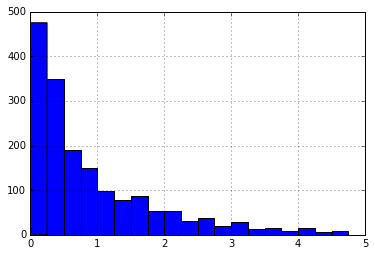

In [58]:
weather["precip"].hist(bins=np.arange(0,5,0.25))

In [16]:
data_path = "../data/processed/shuffled.csv"
df = pd.read_csv(data_path)

In [20]:
# df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [21]:
# df.index = df.set_index("pickup_datetime",drop=True)

In [38]:
def get_time(x_):
    hr = int(x_.split(" ")[1].split(":")[0])
    if x_.split(" ")[2] == "PM":
        if hr == 12:
            return hr
        else:
            return hr + 12
    else:
        hr = int(x_.split(" ")[1].split(":")[0])
        if hr == 12: return 0
        else: return hr

df["date"] = df["pickup_datetime"].apply(lambda x : x.split(" ")[0])
# df["hour"] = df["pickup_datetime"].apply(lambda x : int(x.split(" ")[1].split(":")[0]))
df["hour"] = df["pickup_datetime"].apply(get_time)

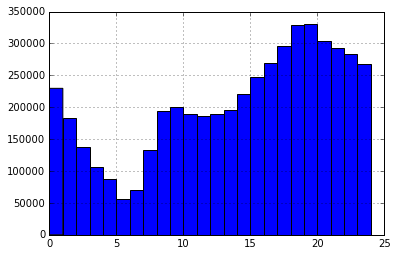

In [40]:
df["hour"].hist(bins=range(0,25))
# print(df["pickup_datetime"].head())

In [47]:
df_temp = df.groupby(["date","hour"]).agg("count").unstack()

In [48]:
df_temp["daily_total"] = df_temp.sum(axis=1)

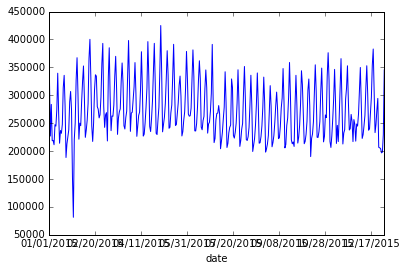

In [51]:
df_temp["daily_total"].plot()

In [59]:
len(weather.groupby("date").agg("sum")["rain"])
#plt.plot(weather.groupby("date").agg("sum")["rain"],df_temp["daily_total"])

366